### Ejercicio 1
#### Desarrolle una función que dada una imagen en escala de grises muestre dicha imagen en 3 dimensiones, donde los ejes X e Y representan el dominio espacial de la imagen y Z representa la intensidad del color gris de cada pixel.

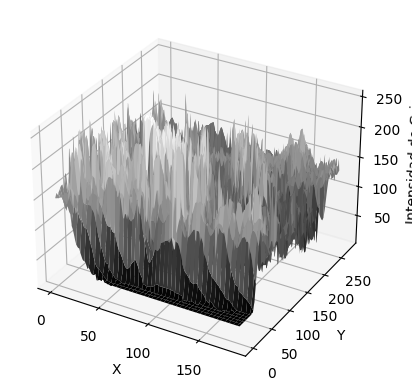

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def plot_grayscale_image_in_3d(image):
    # Obtener las dimensiones de la imagen
    height, width = image.shape
    
    # Crear una malla de coordenadas X e Y
    x = np.arange(0, width, 1)
    y = np.arange(0, height, 1)
    x, y = np.meshgrid(x, y)
    
    # Valores de intensidad de gris de la imagen
    z = image
    
    # Crear una figura 3D
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    
    # Graficar la superficie 3D
    ax.plot_surface(x, y, z, cmap='gray')
    
    # Configurar etiquetas de ejes
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Intensidad de Gris')
    
    # Mostrar la figura
    plt.show()

# Cargar una imagen en escala de grises
image = plt.imread('images.jpg')
grayscale_image = np.mean(image, axis=2)  # Convertir a escala de grises promediando canales RGB 

plot_grayscale_image_in_3d(grayscale_image)


### Ejercicio 2
#### Implemente una función para cada una de las transformaciones: vistas en clase negativa, lineal, logarítmica y exponencial.

In [12]:
import cv2
import numpy as np

def negative_transform(image):
    negative_image = 255 - image
    return negative_image

def linear_transform(image, alpha, beta):
    linear_image = cv2.convertScaleAbs(image, alpha=alpha, beta=beta)
    return linear_image

def logarithmic_transform(image, c=1):
    log_image = c * np.log1p(image)
    log_image = (255 * (log_image - np.min(log_image)) / (np.max(log_image) - np.min(log_image))).astype(np.uint8)
    return log_image

def exponential_transform(image, c=1, gamma=1):
    exp_image = c * np.power(gamma, image)
    exp_image = cv2.convertScaleAbs(exp_image)
    return exp_image

# Cargar una imagen a escala de grises
image = cv2.imread('ejercicio2.jpg', cv2.IMREAD_GRAYSCALE)

# Transformación negativa
negative_image = negative_transform(image)

# Transformación lineal
linear_image = linear_transform(image, alpha=1.2, beta=30)

# Transformación logarítmica
log_image = logarithmic_transform(image, c=20)

# Transformación exponencial
exp_image = exponential_transform(image, c=1, gamma=0.5)

# Mostrar las imágenes resultantes
cv2.imshow('Original Image', image)
cv2.imshow('Negative Transform', negative_image)
cv2.imshow('Linear Transform', linear_image)
cv2.imshow('Logarithmic Transform', log_image)
cv2.imshow('Exponential Transform', exp_image)
cv2.waitKey(0)
cv2.destroyAllWindows()



### Ejercicio 3
#### Desarrolle una función que dada dos imágenes a color, realice las operaciones SUMA, RESTA, AND, OR , XOR con ambas imágenes recuerde que para realizar las operaciones lógicas es necesario pasar la imagen a escala de grises y luego binarizarla.

In [10]:
import cv2
import numpy as np

def process_images(image1, image2):
    # Convertir imágenes a escala de grises
    gray_image1 = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
    gray_image2 = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)

    # Aplicar umbral para obtener imágenes binarias
    _, binary_image1 = cv2.threshold(gray_image1, 128, 255, cv2.THRESH_BINARY)
    _, binary_image2 = cv2.threshold(gray_image2, 128, 255, cv2.THRESH_BINARY)

    # Realizar operaciones lógicas
    bitwise_and = cv2.bitwise_and(binary_image1, binary_image2)
    bitwise_or = cv2.bitwise_or(binary_image1, binary_image2)
    bitwise_xor = cv2.bitwise_xor(binary_image1, binary_image2)

    # Mostrar las imágenes resultantes
    cv2.imshow("Bitwise AND", bitwise_and)
    cv2.imshow("Bitwise OR", bitwise_or)
    cv2.imshow("Bitwise XOR", bitwise_xor)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

# Cargar imágenes
image1 = cv2.imread('imagen1.jpg')
image2 = cv2.imread('imagen2.jpg')

# Redimensionar las imágenes para que tengan el mismo tamaño
width = 800  # Definir el ancho deseado
height = 600  # Definir el alto deseado
image1_resized = cv2.resize(image1, (width, height))
image2_resized = cv2.resize(image2, (width, height))

# Realizar las operaciones
process_images(image1_resized, image2_resized)



### Ejercicio 4
#### Realice una comparación entre el algoritmo de Canny, el operador de Sobel y el operador Laplaciano para encontrar los bordes en una imagen, para este ejercicio puede utilizar las funciones de openCV y cualquier imagen, como entregable debe mostrar una comparación entre los tres enfoques con una tabla donde se muestre las ventajas y desventajas de cada enfoque.

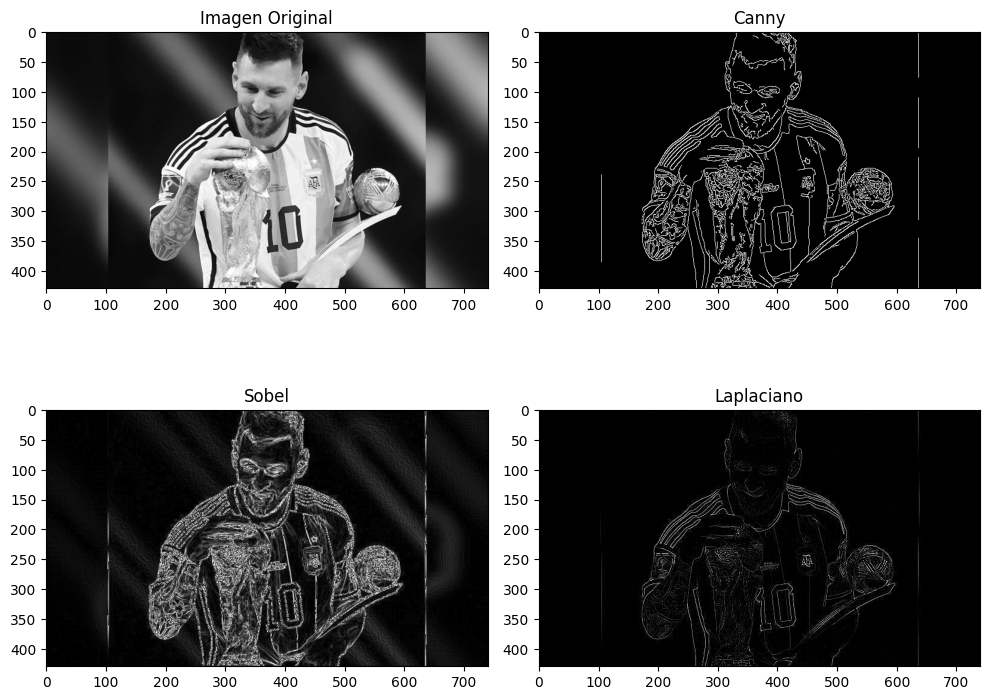

      Enfoque                               Ventajas  \
0       Canny            Detección precisa de bordes   
1       Sobel                        Simple y rápido   
2  Laplaciano  Detecta cambios bruscos en intensidad   

                                  Desventajas  
0                       Sensibilidad al ruido  
1  Sensible al ruido y produce bordes gruesos  
2  Sensible al ruido y produce bordes gruesos  


In [13]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Cargar una imagen en escala de grises
image = cv2.imread('messi.jpg', cv2.IMREAD_GRAYSCALE)

# Detección de bordes con el algoritmo de Canny
canny_edges = cv2.Canny(image, 100, 200)

# Detección de bordes con el operador Sobel
sobel_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)
sobel_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)
sobel_edges = np.sqrt(sobel_x**2 + sobel_y**2).astype(np.uint8)

# Detección de bordes con el operador Laplaciano
laplacian_edges = cv2.Laplacian(image, cv2.CV_8U)

# Crear una figura para mostrar las imágenes
plt.figure(figsize=(10, 8))

# Mostrar las imágenes originales y las imágenes de bordes
plt.subplot(2, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Imagen Original')

plt.subplot(2, 2, 2)
plt.imshow(canny_edges, cmap='gray')
plt.title('Canny')

plt.subplot(2, 2, 3)
plt.imshow(sobel_edges, cmap='gray')
plt.title('Sobel')

plt.subplot(2, 2, 4)
plt.imshow(laplacian_edges, cmap='gray')
plt.title('Laplaciano')

plt.tight_layout()
plt.show()

# Crear una tabla con las ventajas y desventajas de cada enfoque
data = {
    'Enfoque': ['Canny', 'Sobel', 'Laplaciano'],
    'Ventajas': [
        'Detección precisa de bordes',
        'Simple y rápido',
        'Detecta cambios bruscos en intensidad'
    ],
    'Desventajas': [
        'Sensibilidad al ruido',
        'Sensible al ruido y produce bordes gruesos',
        'Sensible al ruido y produce bordes gruesos'
    ]
}

df = pd.DataFrame(data)
print(df)


### Ejercicio 5 
#### En Python Utilizando funciones de OpenCV deberá aplicar los filtros de convolución de tamaño de kernel (3x3, 5x5 y 7x7) las operaciones que deberá realizar son las siguientes: 
#### Kernel Gaussiano de riodo. 
#### Kernel Box de ruido. 
#### Kernel de mediana para ruido. 
#### Kernel Sobel para detección de bornes (en X e Y). 
#### Kernel Lapaciano para detección de bordes. 
#### Kernel de realce (Sharpening). 
#### Kernel de relieve (Embossing)


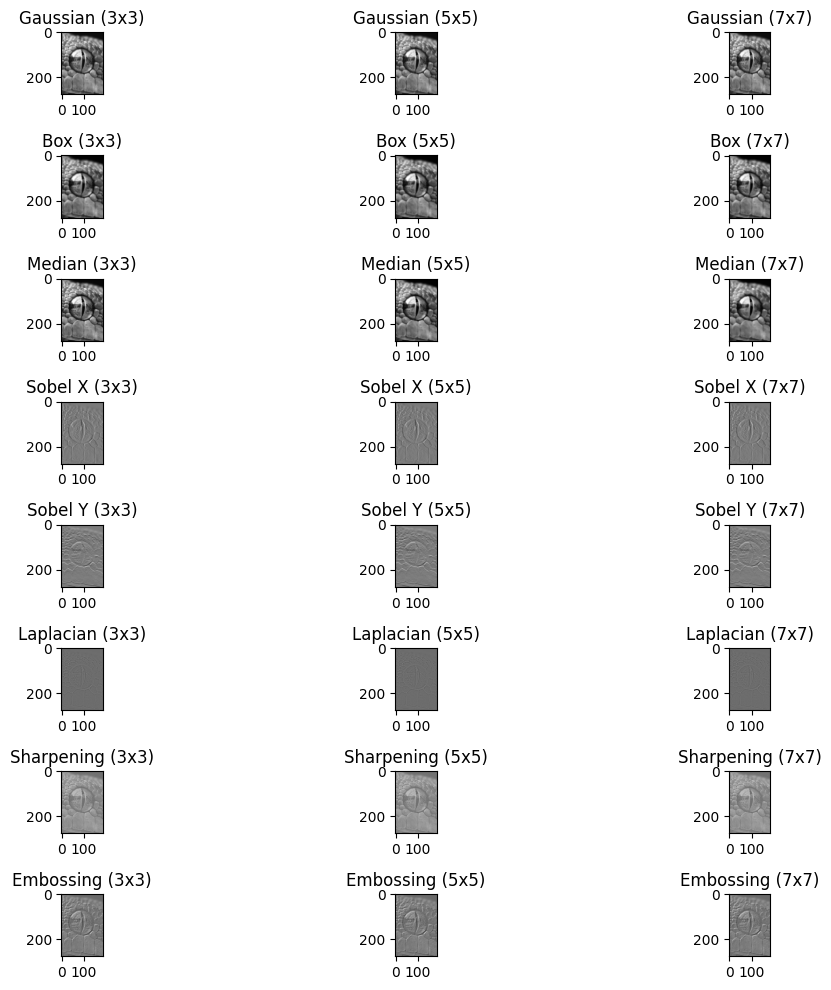

In [17]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Cargar una imagen en escala de grises (reemplaza con la ruta de tu imagen)
image = cv2.imread('images.jpg', cv2.IMREAD_GRAYSCALE)

# Definir tamaños de kernel
kernel_sizes = [3, 5, 7]

# Definir kernels para las operaciones
gaussian_kernel = cv2.getGaussianKernel(7, 1.5)
box_kernel = np.ones((5, 5), np.float32) / 25
sobel_x_kernel = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
sobel_y_kernel = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])
laplacian_kernel = np.array([[0, 1, 0], [1, -4, 1], [0, 1, 0]])
sharpen_kernel = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])
emboss_kernel = np.array([[-2, -1, 0], [-1, 1, 1], [0, 1, 2]])

# Aplicar los diferentes filtros y mostrar las imágenes resultantes
plt.figure(figsize=(12, 10))

for idx, kernel_size in enumerate(kernel_sizes):
    gaussian_filtered = cv2.filter2D(image, cv2.CV_64F, gaussian_kernel)
    box_filtered = cv2.filter2D(image, cv2.CV_64F, box_kernel)
    median_filtered = cv2.medianBlur(image, kernel_size)
    sobel_x_filtered = cv2.filter2D(image, cv2.CV_64F, sobel_x_kernel)
    sobel_y_filtered = cv2.filter2D(image, cv2.CV_64F, sobel_y_kernel)
    laplacian_filtered = cv2.filter2D(image, cv2.CV_64F, laplacian_kernel)
    sharpen_filtered = cv2.filter2D(image, cv2.CV_64F, sharpen_kernel)
    emboss_filtered = cv2.filter2D(image, cv2.CV_64F, emboss_kernel)

    plt.subplot(8, len(kernel_sizes), idx + 1)
    plt.imshow(gaussian_filtered, cmap='gray')
    plt.title(f'Gaussian ({kernel_size}x{kernel_size})')

    plt.subplot(8, len(kernel_sizes), len(kernel_sizes) + idx + 1)
    plt.imshow(box_filtered, cmap='gray')
    plt.title(f'Box ({kernel_size}x{kernel_size})')

    plt.subplot(8, len(kernel_sizes), 2 * len(kernel_sizes) + idx + 1)
    plt.imshow(median_filtered, cmap='gray')
    plt.title(f'Median ({kernel_size}x{kernel_size})')

    plt.subplot(8, len(kernel_sizes), 3 * len(kernel_sizes) + idx + 1)
    plt.imshow(sobel_x_filtered, cmap='gray')
    plt.title(f'Sobel X ({kernel_size}x{kernel_size})')

    plt.subplot(8, len(kernel_sizes), 4 * len(kernel_sizes) + idx + 1)
    plt.imshow(sobel_y_filtered, cmap='gray')
    plt.title(f'Sobel Y ({kernel_size}x{kernel_size})')

    plt.subplot(8, len(kernel_sizes), 5 * len(kernel_sizes) + idx + 1)
    plt.imshow(laplacian_filtered, cmap='gray')
    plt.title(f'Laplacian ({kernel_size}x{kernel_size})')

    plt.subplot(8, len(kernel_sizes), 6 * len(kernel_sizes) + idx + 1)
    plt.imshow(sharpen_filtered, cmap='gray')
    plt.title(f'Sharpening ({kernel_size}x{kernel_size})')

    plt.subplot(8, len(kernel_sizes), 7 * len(kernel_sizes) + idx + 1)
    plt.imshow(emboss_filtered, cmap='gray')
    plt.title(f'Embossing ({kernel_size}x{kernel_size})')

plt.tight_layout()
plt.show()
